In [25]:
%load_ext autoreload
%autoreload 2

from scipy.stats import bernoulli
from bandit import explore_then_commit, epsilon_greedy, ucb, run_bandit_algorithm, thompson_sampling
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<BarContainer object of 10 artists>

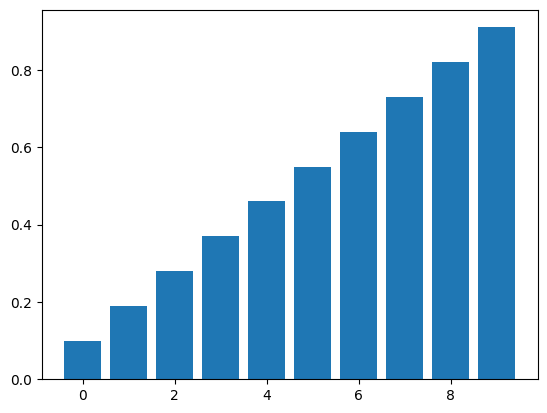

In [8]:
# means equally spaces between 0 and 1 exclusive
means = np.linspace(1/10, 1, 10, endpoint=False)
bernoullis = [bernoulli(mean) for mean in means]
n_rounds = 10000
plt.bar(range(10), means)

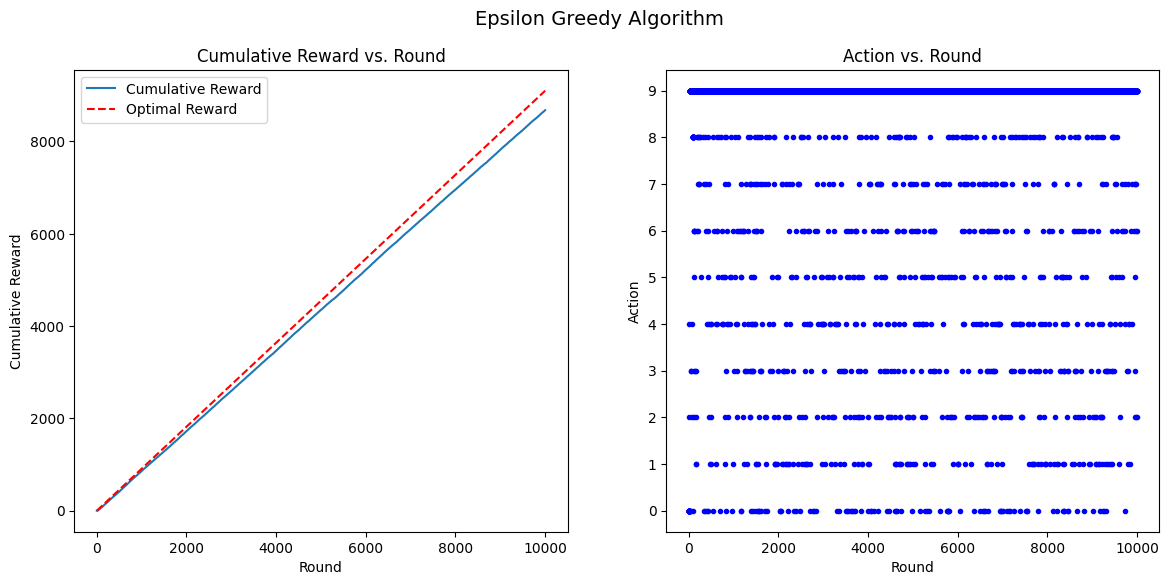

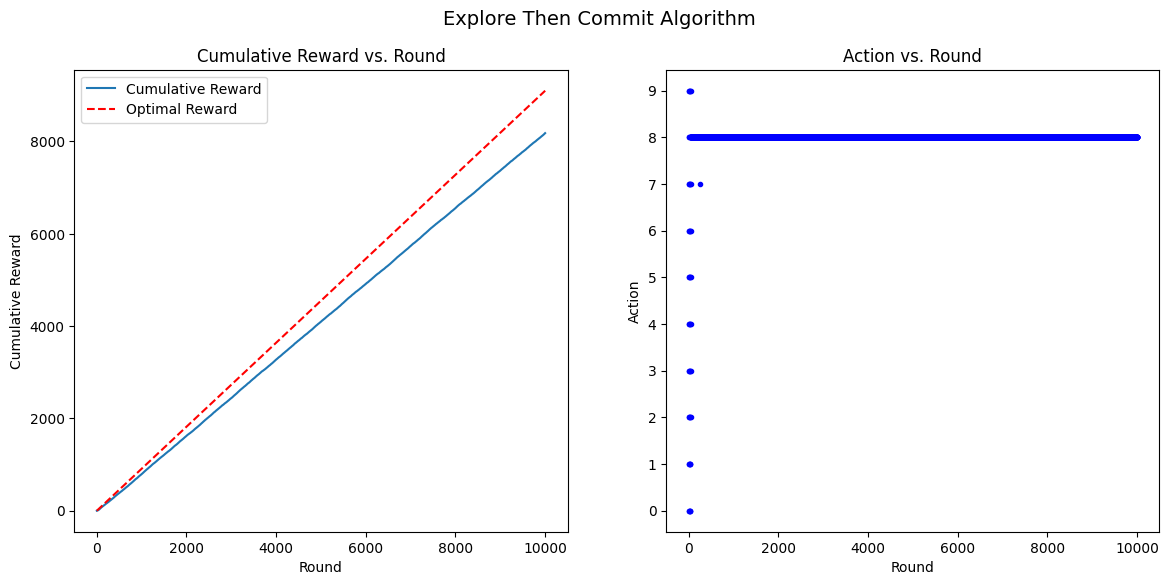

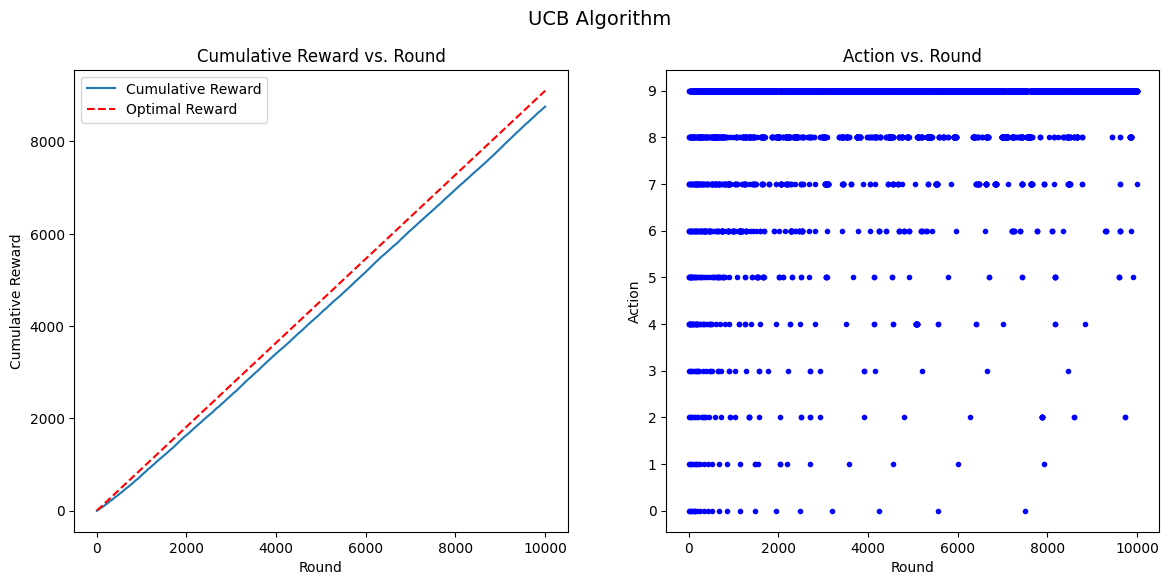

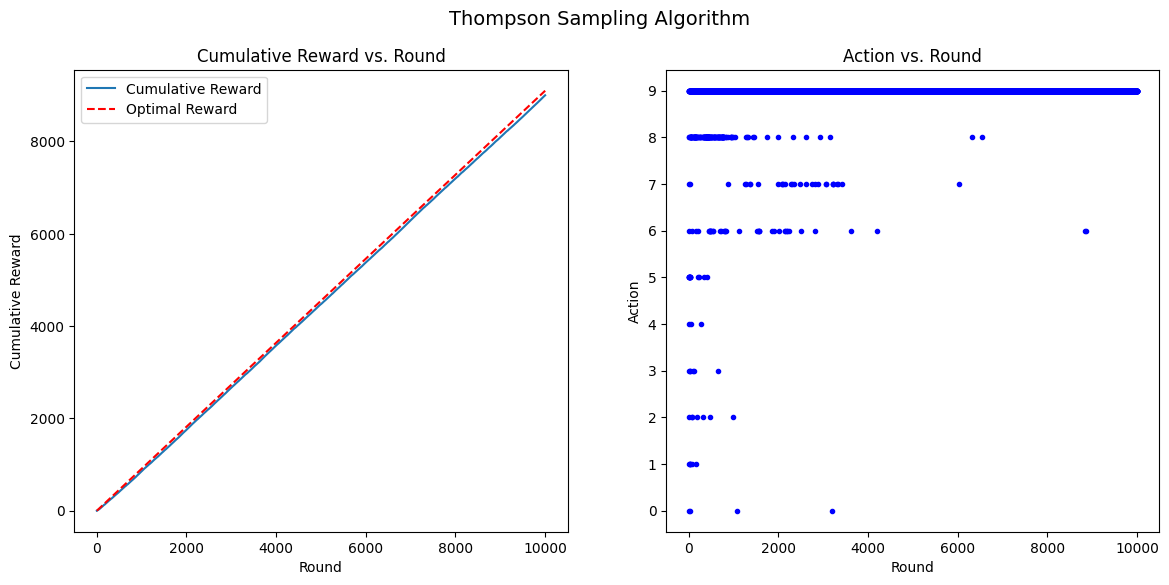

In [27]:
run_bandit_algorithm("Epsilon Greedy", epsilon_greedy, bernoullis, n_rounds, 0.1)
run_bandit_algorithm("Explore Then Commit", explore_then_commit, bernoullis, n_rounds, 5)
run_bandit_algorithm("UCB", ucb, bernoullis, n_rounds)
run_bandit_algorithm("Thompson Sampling", thompson_sampling, bernoullis, n_rounds)